In [219]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [220]:
#ML library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [221]:
# importing machine learning models for prediction xboost in ensembleing
import xgboost as xgb
# importing bagging module
from sklearn.ensemble import BaggingRegressor

In [222]:

from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [223]:
#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Covid19/CovidCaseDetails_ensemble.csv')

data.head( )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,diagnosed_date,age,gender,current_status,status,status_change_date,travel_details
0,0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,30-01-2020,20,F,R,P,14-02-2020,Travelled from Wuhan
1,1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,2/2/2020,21,M,R,P,14-02-2020,Travelled from Wuhan
2,2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,3/2/2020,22,F,R,P,14-02-2020,Travelled from Wuhan
3,3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,2/3/2020,45,M,R,P,15-03-2020,"Travelled from Austria, Italy"
4,4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,2/3/2020,24,M,R,P,2/3/2020,"Travelled from Austria, Italy"


In [ ]:
#2.DataWranglinig - preprocesssing

In [224]:
#data.drop(['Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24'],axis=1,inplace=True)
data.head()

,id,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,diagnosed_date,age,gender,current_status,status,status_change_date,travel_details
0,0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,30-01-2020,20,F,R,P,14-02-2020,Travelled from Wuhan
1,1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,2/2/2020,21,M,R,P,14-02-2020,Travelled from Wuhan
2,2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,3/2/2020,22,F,R,P,14-02-2020,Travelled from Wuhan
3,3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,2/3/2020,45,M,R,P,15-03-2020,"Travelled from Austria, Italy"
4,4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,2/3/2020,24,M,R,P,2/3/2020,"Travelled from Austria, Italy"


In [225]:
data.drop('id',axis=1,inplace=True)
data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,diagnosed_date,age,gender,current_status,status,status_change_date,travel_details
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,30-01-2020,20,F,R,P,14-02-2020,Travelled from Wuhan
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,2/2/2020,21,M,R,P,14-02-2020,Travelled from Wuhan
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,3/2/2020,22,F,R,P,14-02-2020,Travelled from Wuhan
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,2/3/2020,45,M,R,P,15-03-2020,"Travelled from Austria, Italy"
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,2/3/2020,24,M,R,P,2/3/2020,"Travelled from Austria, Italy"


In [226]:
data.drop(['diagnosed_date','status_change_date'],axis=1,inplace=True)
data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,age,gender,current_status,status,travel_details
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,20,F,R,P,Travelled from Wuhan
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,21,M,R,P,Travelled from Wuhan
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,22,F,R,P,Travelled from Wuhan
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,45,M,R,P,"Travelled from Austria, Italy"
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,24,M,R,P,"Travelled from Austria, Italy"


In [227]:
data.drop(['travel_details'],axis=1,inplace=True)
data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,age,gender,current_status,status
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,20,F,R,P
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,21,M,R,P
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,22,F,R,P
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,45,M,R,P
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,24,M,R,P


In [228]:

data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,age,gender,current_status,status
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,20,F,R,P
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,21,M,R,P
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,22,F,R,P
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,45,M,R,P
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,24,M,R,P


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


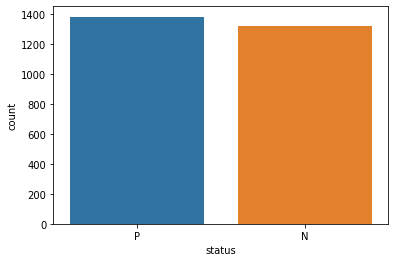

In [229]:
import seaborn as sns
print(sns.countplot(data['status']))

plt.show()


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


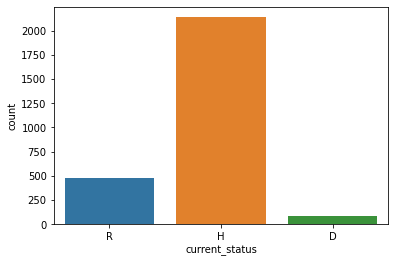

In [230]:
print(sns.countplot(data['current_status']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


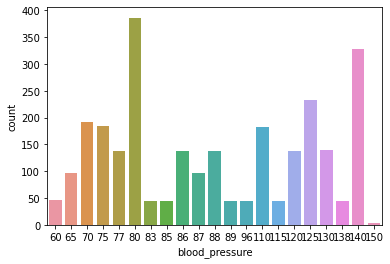

In [231]:
sns.countplot(data['blood_pressure'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


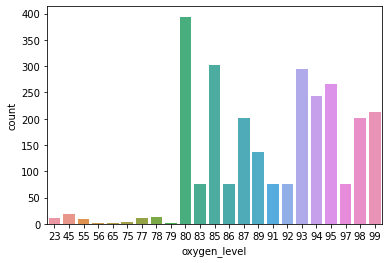

In [232]:
sns.countplot(data['oxygen_level'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


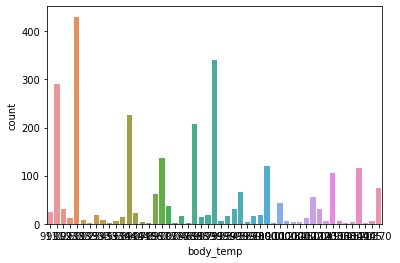

In [233]:
sns.countplot(data['body_temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


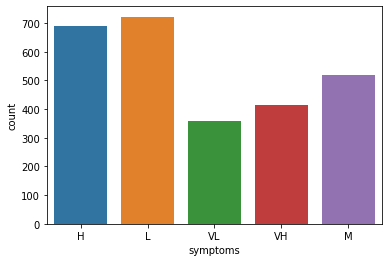

In [234]:
sns.countplot(data['symptoms'])

In [ ]:
#3.Analyze the data

In [235]:
train,test=train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(1890, 14)
(811, 14)


In [ ]:
#relevant columns

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   government_id         2701 non-null   int64  
 1   symptom_id            2701 non-null   int64  
 2   blood_pressure        2701 non-null   int64  
 3   blood_pressure_range  2701 non-null   object 
 4   oxygen_level          2701 non-null   int64  
 5   oxygen_level_range    2701 non-null   object 
 6   body_temp             2701 non-null   float64
 7   body_temp_range       2701 non-null   object 
 8   symptoms              2701 non-null   object 
 9   other_diseases        2701 non-null   object 
 10  age                   2701 non-null   int64  
 11  gender                2701 non-null   object 
 12  current_status        2701 non-null   object 
 13  status                2701 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 295.5+ KB


In [237]:
data.describe()

,government_id,symptom_id,blood_pressure,oxygen_level,body_temp,age
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,2351.000000,102.977416,98.825250,89.243243,96.872973,44.658645
std,779.855863,1.292661,25.427701,8.837487,4.051061,19.665549
min,1001.000000,101.000000,60.000000,23.000000,91.000000,1.000000
25%,1676.000000,102.000000,80.000000,85.000000,93.000000,31.000000
50%,2351.000000,103.000000,87.000000,92.000000,97.600000,44.000000
75%,3026.000000,104.000000,125.000000,95.000000,99.600000,56.000000
max,3701.000000,105.000000,150.000000,99.000000,105.000000,99.000000


In [238]:
data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,age,gender,current_status,status
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,20,F,R,P
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,21,M,R,P
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,22,F,R,P
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,45,M,R,P
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,24,M,R,P


In [239]:
#prediction variables
prediction_var=['government_id','age','symptom_id','blood_pressure','oxygen_level','body_temp']

In [240]:
prediction_var

['government_id',
 'age',
 'symptom_id',
 'blood_pressure',
 'oxygen_level',
 'body_temp']

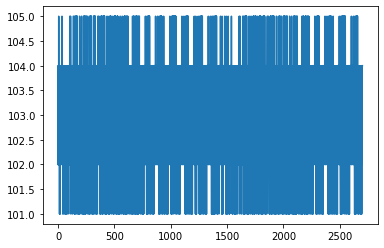

In [241]:
plt.plot(data['symptom_id'])
plt.show()

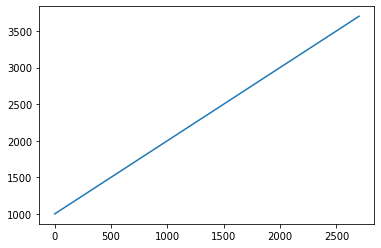

In [242]:
plt.plot(data['government_id'])
plt.show()

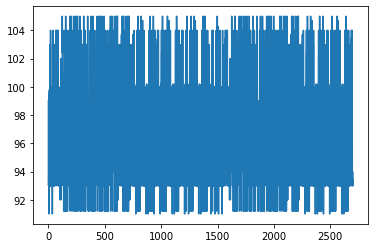

In [243]:
plt.plot(data['body_temp'])
plt.show()

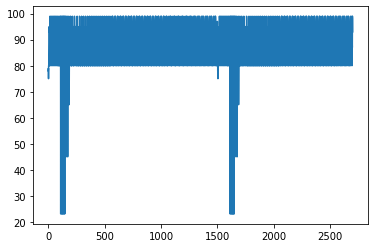

In [244]:
plt.plot(data['oxygen_level'])
plt.show()

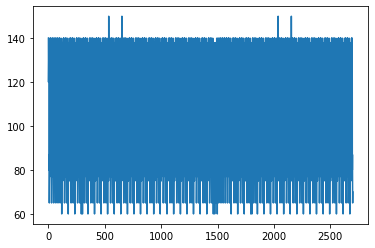

In [245]:
plt.plot(data['blood_pressure'])
plt.show()

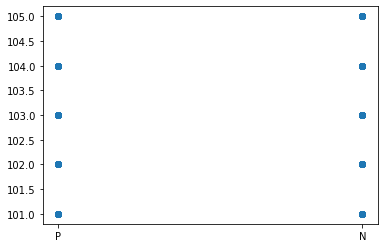

In [246]:
plt.scatter(data['status'],data['symptom_id'])
plt.show()

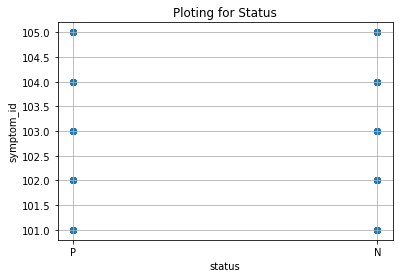

In [247]:
plt.scatter(data['status'],data['symptom_id'])
plt.xlabel("status")
plt.ylabel("symptom_id")
plt.title("Ploting for Status")
plt.grid()

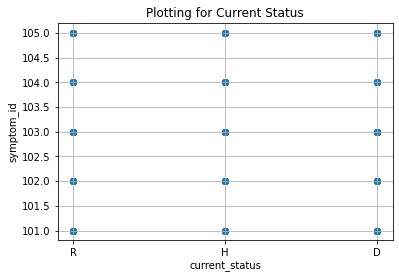

In [248]:
plt.scatter(data['current_status'],data['symptom_id'])
plt.xlabel("current_status")
plt.ylabel("symptom_id")
plt.title("Plotting for Current Status")
plt.grid()

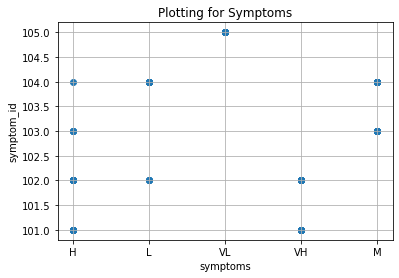

In [249]:
plt.scatter(data['symptoms'],data['symptom_id'])
plt.xlabel("symptoms")
plt.ylabel("symptom_id")
plt.title("Plotting for Symptoms")
plt.grid()

In [250]:
#---create ensemble moon split
coivd_data=data.size
X, y = make_moons(n_samples=coivd_data, noise=0.30)

In [251]:
#----Apply ensemble Voting 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [252]:
log = LogisticRegression()
rnd = RandomForestClassifier(n_estimators=3)
svm = SVC()

In [253]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)],
    voting='hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=3)),
                             ('support_vector_machine', SVC())])

In [254]:

for clf in (log, rnd, svm, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8508567801988576
RandomForestClassifier 0.8883012481489316
SVC 0.9148508567801988
VotingClassifier 0.9069177067907764


In [257]:
#TRAINING DATA
#input training data for Status
train_X=train[prediction_var]
#output training data
train_Y=train['status']

In [258]:
#input training data for Symptoms
train_X=train[prediction_var]
#output training data
train_Y1=train['symptoms']

In [259]:
#input training data for Currentstatus
train_X=train[prediction_var]
#output training data
train_Z=train['current_status']

In [260]:
#TESTING DATA
#same steps for testing data
#input testing data for Status
test_X=test[prediction_var]
#output testing data
test_Y=test['status']

In [261]:
#same steps for testing data
#input testing data for Symptoms
test_X=test[prediction_var]
#output testing data
test_Y1=test['symptoms']

In [262]:
#same steps for testing data Current status
#input testing data Current_Status
test_X=test[prediction_var]
#output testing data
test_Z=test['current_status']

In [263]:
#Training the model Status

logistic_model=LogisticRegression()
logistic_model.fit(train_X,train_Y)

LogisticRegression()

In [264]:
#Training the model for Current status

logistic_model_1=LogisticRegression()
logistic_model_1.fit(train_X,train_Z)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [265]:
#Training the model for Symptoms

logistic_model_2=LogisticRegression()
logistic_model_2.fit(train_X,train_Y1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [266]:
#Testing the algorithm Status
predicted_value=logistic_model.predict(test_X)

In [267]:
#Testing the algorithm for Current status
predicted_value_1=logistic_model_1.predict(test_X)

In [268]:
#Testing the algorithm for Symptoms
predicted_value_2=logistic_model_2.predict(test_X)

In [269]:
# initializing the bagging model using XGboost as base model with default parameters
model = BaggingRegressor(base_estimator=xgb.XGBRegressor())

In [270]:
# training model
model.fit(train_X,train_X)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[05:52:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

BaggingRegressor(base_estimator=XGBRegressor())

In [271]:
# predicting the output on the test dataset
pred = model.predict(test_X)
print(pred)

[3240.3567  1338.0306  2400.3735  3519.2847  3357.14    2293.586
 1973.7546  2069.1147  1277.6166  1086.4524  1413.8416  1520.5807
 1641.9512  2007.22    3037.6626  2828.0168  1367.888   3565.8464
 2854.331   3405.8086  3670.67    1446.76    3547.1372  1458.9142
 1757.5615  2335.627   3411.8462  3322.526   2049.1216  3248.2354
 3376.164   2535.0686  1198.9882  1008.8667  1269.4381  2173.4941
 1421.291   3161.7847  3325.595   1760.0638  2672.4297  3570.3052
 3563.9797  1402.7054  3589.6343  2310.1235  1239.292   3362.1206
 3429.8     3261.8784  2153.2974  2312.9373  2364.1516  1569.8142
 1876.2809  2202.18    1891.7737  2102.5815  1873.7214  3436.0933
 2909.278   1959.8499  3061.9019  1108.9174  2056.3696  1922.2643
 1386.2498  1030.6365  2992.4758  3204.9077  1374.7759  2648.955
 3172.1401  2572.115   3314.8647  2236.3298  2613.9204  2044.0684
 1567.3552  3386.7065  1654.6832  1483.7734  2465.611   2169.6099
 2733.226   2996.1526  1603.0234  3460.427   1948.4695  1056.8625
 2808.8723  

In [272]:
#SYMPTOMS
#accuracy for Symptoms
metrics.accuracy_score(test_Y1,predicted_value)
#prediction using symptoms
pd.DataFrame({'predicted_value':predicted_value_2,'KnowO/P':test_Y1})

,predicted_value,KnowO/P
2240,H,M
337,VH,H
1400,H,VH
2518,L,VL
2358,L,L
...,...,...
1473,L,L
755,VL,H
412,L,VL
1566,L,L


In [273]:
#STATUS
#accuracy for Status
metrics.accuracy_score(test_Y,predicted_value)

0.6029593094944513

In [274]:
#prediction using status
pd.DataFrame({'predicted_value':predicted_value,'KnowO/P':test_Y})

,predicted_value,KnowO/P
2240,P,P
337,P,P
1400,P,P
2518,N,P
2358,N,N
...,...,...
1473,N,P
755,P,N
412,N,N
1566,N,N


In [275]:
#CURRENT STATUS
#accuracy for Current_Status
metrics.accuracy_score(test_Z,predicted_value_1)

0.782983970406905

In [276]:
#prediction using current_status
pd.DataFrame({'predicted_value':predicted_value_1,'KnowO/P':test_Z})

,predicted_value,KnowO/P
2240,H,R
337,H,R
1400,H,H
2518,H,H
2358,H,R
...,...,...
1473,H,H
755,H,H
412,H,H
1566,H,H
